In [1]:
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sisyphus2.backend import analysis, visualizations, simulation_tools

In [5]:
from sisyphus2.backend.networks import Model

In [6]:
from sisyphus2.tasks import task

In [7]:
rdm = task.rdm()

In [3]:
gen = rdm.generate_train_trials()

In [5]:
gen.next()[0].shape

(128, 200, 1)

In [2]:
ff = task.flip_flop()

In [3]:
gen = ff.generate_train_trials()
gen.next()[0].shape

(128, 24, 2)

In [8]:
dm = task.delayed_memory()

In [9]:
gen = dm.generate_train_trials()
dat = gen.next()

In [10]:
params = dm.__dict__

In [11]:
model = Model(params)

In [12]:
learning_rate = .001 
training_iters = 100000
weights_path = '../weights/mem_sac.npz'
sess = tf.Session()
model.train(sess, gen, learning_rate = learning_rate, 
            training_iters = training_iters, weights_path = weights_path)
sess.close()

Iter 640, Minibatch Loss= 0.055430
Iter 1280, Minibatch Loss= 0.046053
Iter 1920, Minibatch Loss= 0.043285
Iter 2560, Minibatch Loss= 0.042252
Iter 3200, Minibatch Loss= 0.041562
Iter 3840, Minibatch Loss= 0.040982
Iter 4480, Minibatch Loss= 0.040013
Iter 5120, Minibatch Loss= 0.040159
Iter 5760, Minibatch Loss= 0.040095
Iter 6400, Minibatch Loss= 0.040454
Iter 7040, Minibatch Loss= 0.039940
Iter 7680, Minibatch Loss= 0.039916
Iter 8320, Minibatch Loss= 0.039872
Iter 8960, Minibatch Loss= 0.039551
Iter 9600, Minibatch Loss= 0.039434
Iter 10240, Minibatch Loss= 0.039550
Iter 10880, Minibatch Loss= 0.039492
Iter 11520, Minibatch Loss= 0.039268
Iter 12160, Minibatch Loss= 0.038926
Iter 12800, Minibatch Loss= 0.038910
Iter 13440, Minibatch Loss= 0.038310
Iter 14080, Minibatch Loss= 0.038281
Iter 14720, Minibatch Loss= 0.037713
Iter 15360, Minibatch Loss= 0.037898
Iter 16000, Minibatch Loss= 0.037075
Iter 16640, Minibatch Loss= 0.036480
Iter 17280, Minibatch Loss= 0.035898
Iter 17920, Minib

In [13]:
sim = simulation_tools.Simulator(params, weights_path=weights_path)

In [14]:
trial = gen.next()[0][0,:,:]

In [15]:
output,states = sim.run_trial(trial)

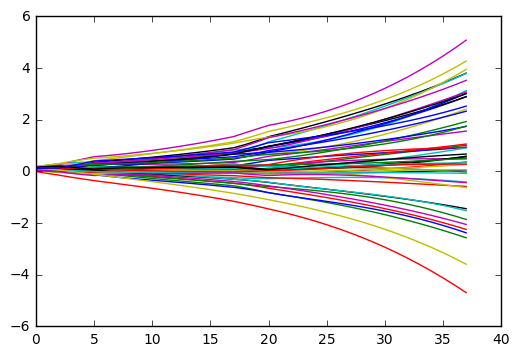

In [16]:
plt.plot(states[:,0,:])
plt.show()

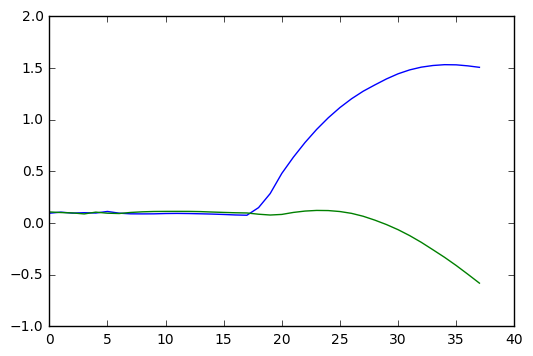

In [17]:
plt.plot(output[:,0,:])
plt.show()

In [18]:
I = analysis.hahnloser_fixed_point(sim, trial)

In [19]:
I

[]